# Face Recognition Development

This notebook demonstrates face recognition using DeepFace library with VGG-Face model.

## Features
- **Webcam Capture**: Capture images directly from your webcam using OpenCV
- **Face Detection**: Test multiple detector backends (opencv, retinaface, mtcnn)
- **Face Extraction**: Extract and visualize detected faces with confidence scores
- **Face Verification**: Compare two face images using DeepFace.verify()

## Configuration Used
- **Model**: VGG-Face (pretrained deep learning model)
- **Detector**: RetinaFace (accurate face detector)
- **Distance Metric**: Cosine similarity
- **Platform**: Windows Local (OpenCV-based webcam capture)
- **Storage**: Local filesystem (`data/faces/`)

## Workflow
1. Import libraries and setup directories
2. Capture face images from webcam
3. Extract faces using different detectors
4. Verify if two faces belong to the same person

## 1. Import Libraries and Setup

In [12]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2
import os
import glob
import numpy as np
from datetime import datetime
from PIL import Image as PILImage
import pprint

print("✅ Libraries imported successfully")
print(f"   DeepFace version: {DeepFace.__version__ if hasattr(DeepFace, '__version__') else 'unknown'}")

✅ Libraries imported successfully
   DeepFace version: 0.0.95


## 2. Configure Save Directory

In [13]:
# Setup save directory for captured images
SAVE_DIR = os.path.join(os.getcwd(), "data", "faces")
os.makedirs(SAVE_DIR, exist_ok=True)
print(f"✅ Images will be saved to: {SAVE_DIR}")

✅ Images will be saved to: d:\multimodal_biometric_auth\notebooks\data\faces


## 3. Webcam Capture Function

Capture images directly from your local webcam (Windows compatible)

In [15]:
def take_photo(filename_prefix="face_sample"):
    """
    Capture a photo from webcam using OpenCV
    
    Args:
        filename_prefix: Prefix for the saved filename
        
    Returns:
        str: Path to the saved image, or None if capture failed
    """
    print("📸 Starting webcam capture...")
    print("   Press SPACE to capture")
    print("   Press ESC to cancel")
    
    # Initialize webcam
    cap = cv2.VideoCapture(0)
    
    if not cap.isOpened():
        print("❌ Error: Could not open webcam")
        return None
    
    # Set resolution
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    
    captured_frame = None
    
    while True:
        ret, frame = cap.read()
        
        if not ret:
            print("❌ Error: Could not read frame")
            break
        
        # Display the frame
        display_frame = frame.copy()
        cv2.putText(display_frame, "Press SPACE to capture, ESC to cancel", 
                    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.imshow('Webcam - Face Capture', display_frame)
        
        # Wait for key press
        key = cv2.waitKey(1) & 0xFF
        
        if key == 32:  # SPACE key
            captured_frame = frame
            print("✅ Image captured!")
            break
        elif key == 27:  # ESC key
            print("❌ Capture cancelled")
            break
    
    # Release webcam and close windows
    cap.release()
    cv2.destroyAllWindows()
    
    if captured_frame is None:
        return None
    
    # Generate unique filename with timestamp
    ts = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{filename_prefix}_{ts}.jpg"
    save_path = os.path.join(SAVE_DIR, filename)
    
    # Save the image
    cv2.imwrite(save_path, captured_frame)
    print(f"✅ Saved: {save_path}")
    
    # Display the captured image
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(captured_frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Captured Image: {filename}', fontsize=12, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return save_path

# Run this function to capture a photo
print("📷 Webcam capture function ready!")
print("   Call: take_photo('your_name') to capture an image")

📷 Webcam capture function ready!
   Call: take_photo('your_name') to capture an image


## 4. Test Webcam Capture

Run this cell to test capturing an image from your webcam

📸 Starting webcam capture...
   Press SPACE to capture
   Press ESC to cancel
✅ Image captured!
✅ Image captured!
✅ Saved: d:\multimodal_biometric_auth\notebooks\data\faces\test_capture_20251104_001821.jpg
✅ Saved: d:\multimodal_biometric_auth\notebooks\data\faces\test_capture_20251104_001821.jpg


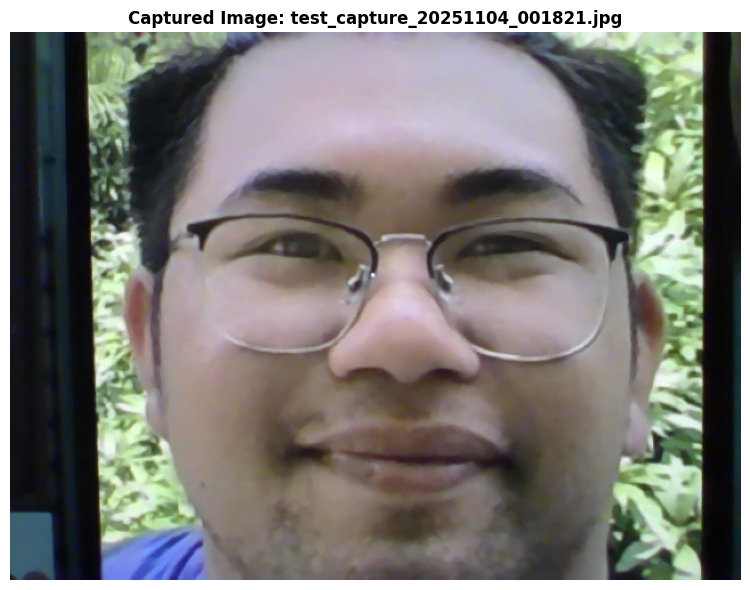

In [16]:
# Test: Capture an image from webcam
captured_image_path = take_photo("test_capture")

## 5. List Captured Images

View all captured images in the save directory

📂 Found 2 image(s) in d:\multimodal_biometric_auth\notebooks\data\faces:
   1. test_capture_20251103_234846.jpg
   2. test_capture_20251104_001821.jpg

📸 Latest image path:
   d:\multimodal_biometric_auth\notebooks\data\faces\test_capture_20251104_001821.jpg


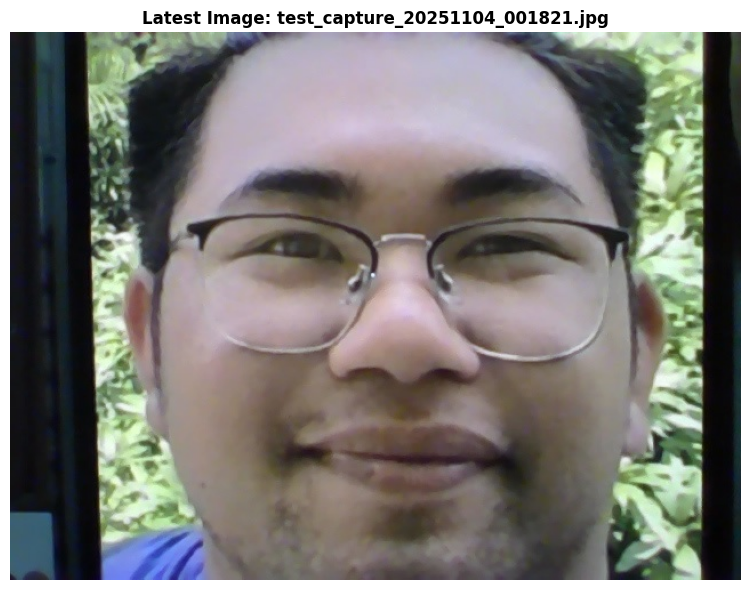

In [17]:
# List all captured images (latest one last)
files = sorted(glob.glob(os.path.join(SAVE_DIR, "*.jpg")))

if files:
    print(f"📂 Found {len(files)} image(s) in {SAVE_DIR}:")
    print("=" * 60)
    for i, file in enumerate(files, 1):
        print(f"   {i}. {os.path.basename(file)}")
    
    latest_image = files[-1]   # the most recent image captured
    print("=" * 60)
    print(f"\n📸 Latest image path:")
    print(f"   {latest_image}")
    
    # Display the latest image
    img = cv2.imread(latest_image)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title(f'Latest Image: {os.path.basename(latest_image)}', fontsize=12, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ No images found in: {SAVE_DIR}")
    print("   Please capture an image first using take_photo()")
    latest_image = None

## 6. Face Extraction with DeepFace

Extract and visualize faces from images using different detector backends

🔍 Extracting faces from the latest image...
   Image: test_capture_20251104_001821.jpg

📊 Testing with detector: opencv
   ✓ Found 1 face(s)
   Face 1:
      Confidence: 0.91
      Facial Area: {'x': 97, 'y': 0, 'w': 497, 'h': 479, 'left_eye': (259, 371), 'right_eye': (251, 188)}


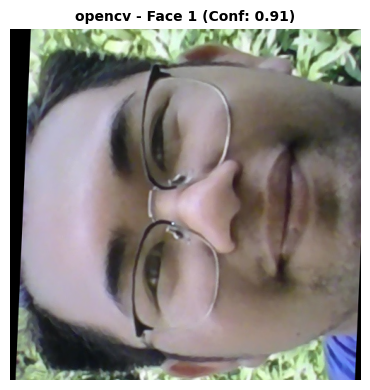


📊 Testing with detector: retinaface
   ✓ Found 1 face(s)
   Face 1:
      Confidence: 1.0
      Facial Area: {'x': 143, 'y': 9, 'w': 394, 'h': 470, 'left_eye': (435, 184), 'right_eye': (252, 195), 'nose': (347, 275), 'mouth_left': (424, 366), 'mouth_right': (265, 376)}
   ✓ Found 1 face(s)
   Face 1:
      Confidence: 1.0
      Facial Area: {'x': 143, 'y': 9, 'w': 394, 'h': 470, 'left_eye': (435, 184), 'right_eye': (252, 195), 'nose': (347, 275), 'mouth_left': (424, 366), 'mouth_right': (265, 376)}


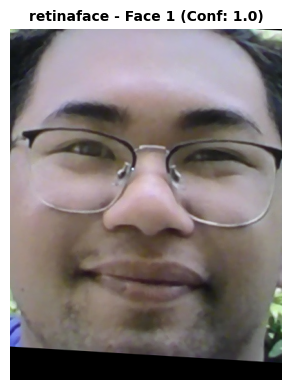


📊 Testing with detector: mtcnn
   ✓ Found 1 face(s)
   Face 1:
      Confidence: 1.0
      Facial Area: {'x': 133, 'y': 0, 'w': 400, 'h': 479, 'left_eye': (433, 185), 'right_eye': (250, 184)}
   ✓ Found 1 face(s)
   Face 1:
      Confidence: 1.0
      Facial Area: {'x': 133, 'y': 0, 'w': 400, 'h': 479, 'left_eye': (433, 185), 'right_eye': (250, 184)}


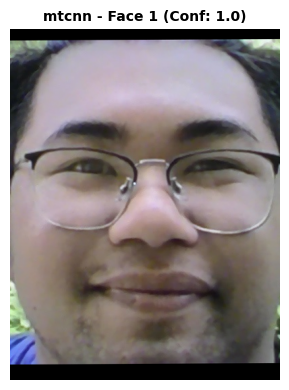


✅ Face extraction complete


In [18]:
# Extract faces from the latest captured image
if latest_image and os.path.exists(latest_image):
    print("🔍 Extracting faces from the latest image...")
    print(f"   Image: {os.path.basename(latest_image)}")
    print("=" * 60)
    
    # Test with different detector backends
    detectors = ['opencv', 'retinaface', 'mtcnn']
    
    for detector in detectors:
        try:
            print(f"\n📊 Testing with detector: {detector}")
            
            # Extract faces
            face_objs = DeepFace.extract_faces(
                img_path=latest_image,
                detector_backend=detector,
                enforce_detection=False
            )
            
            print(f"   ✓ Found {len(face_objs)} face(s)")
            
            # Display each detected face
            for idx, face_obj in enumerate(face_objs, 1):
                face_img = face_obj['face']
                confidence = face_obj.get('confidence', 'N/A')
                facial_area = face_obj.get('facial_area', {})
                
                print(f"   Face {idx}:")
                print(f"      Confidence: {confidence}")
                print(f"      Facial Area: {facial_area}")
                
                # Display the face
                plt.figure(figsize=(4, 4))
                plt.imshow(face_img)
                plt.title(f'{detector} - Face {idx} (Conf: {confidence})', 
                         fontsize=10, fontweight='bold')
                plt.axis('off')
                plt.tight_layout()
                plt.show()
                
        except Exception as e:
            print(f"   ⚠️ Error with {detector}: {str(e)}")
    
    print("\n" + "=" * 60)
    print("✅ Face extraction complete")
    
else:
    print("❌ No image available for face extraction")
    print("   Please capture an image first using take_photo()")

## 7. Face Verification with DeepFace

Compare two face images to verify if they belong to the same person

📸 Using captured images:
   Image 1: test_capture_20251104_001821.jpg
   Image 2: test_capture_20251103_234846.jpg

🔍 FACE VERIFICATION

⚙️ Configuration:
   Model: VGG-Face
   Detector: retinaface
   Enforce Detection: True


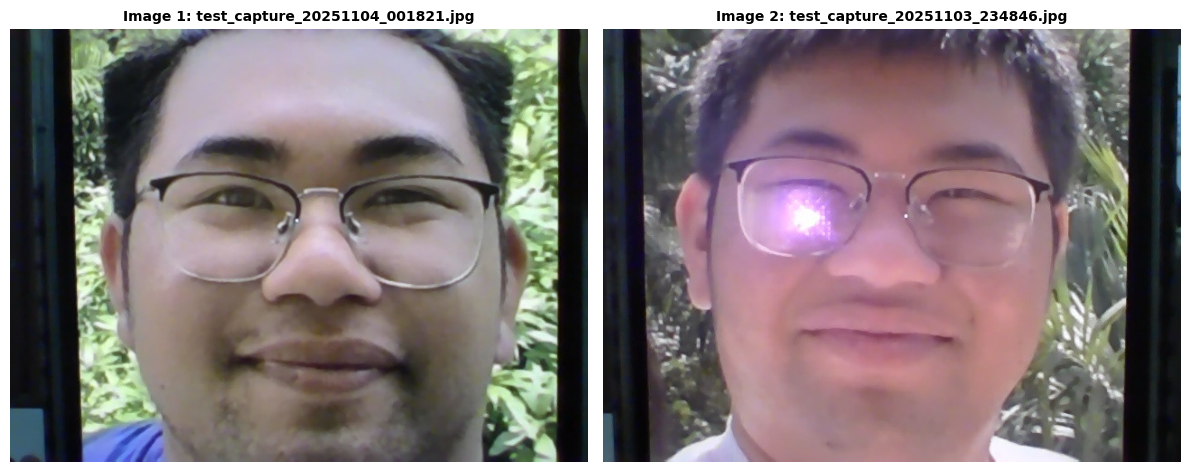


🔍 Extracting faces...
   ✓ Image 1: Found 1 face(s)
   ✓ Image 2: Found 1 face(s)

📸 Displaying extracted faces:
   ✓ Image 1: Found 1 face(s)
   ✓ Image 2: Found 1 face(s)

📸 Displaying extracted faces:


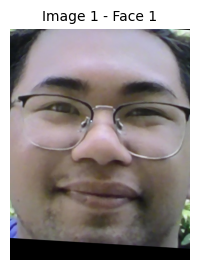

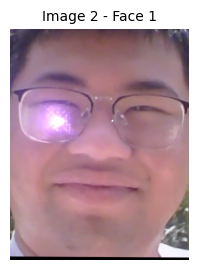


🔍 Verifying images...

📊 Verification Result:
{'confidence': 19.22,
 'detector_backend': 'retinaface',
 'distance': 0.690654,
 'facial_areas': {'img1': {'h': 470,
                           'left_eye': (435, 184),
                           'mouth_left': (424, 366),
                           'mouth_right': (265, 376),
                           'nose': (347, 275),
                           'right_eye': (252, 195),
                           'w': 394,
                           'x': 143,
                           'y': 9},
                  'img2': {'h': 454,
                           'left_eye': (398, 181),
                           'mouth_left': (391, 342),
                           'mouth_right': (228, 344),
                           'nose': (312, 265),
                           'right_eye': (228, 182),
                           'w': 356,
                           'x': 132,
                           'y': 25}},
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'thresho

In [19]:
# Face verification example
# You need to provide two image paths to compare

# Option 1: Use captured images
if latest_image and len(files) >= 2:
    img1_path = files[-1]  # Latest image
    img2_path = files[-2]  # Second latest image
    print(f"📸 Using captured images:")
    print(f"   Image 1: {os.path.basename(img1_path)}")
    print(f"   Image 2: {os.path.basename(img2_path)}")
else:
    # Option 2: Manually specify image paths
    # img1_path = "path/to/first/image.jpg"
    # img2_path = "path/to/second/image.jpg"
    print("⚠️ Need at least 2 captured images for verification")
    print("   Please capture more images or specify paths manually")
    img1_path = None
    img2_path = None

# Perform verification if images are available
if img1_path and img2_path:
    print("\n" + "=" * 60)
    print("🔍 FACE VERIFICATION")
    print("=" * 60)
    
    # Configuration
    model_name = "VGG-Face"          # Options: VGG-Face, Facenet, ArcFace, etc.
    detector_backend = "retinaface"  # Options: opencv, retinaface, mtcnn
    enforce_detection = True         # Set False if images may not have perfect faces
    
    print(f"\n⚙️ Configuration:")
    print(f"   Model: {model_name}")
    print(f"   Detector: {detector_backend}")
    print(f"   Enforce Detection: {enforce_detection}")
    
    # Display the two images being compared
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    img1 = cv2.imread(img1_path)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    axes[0].imshow(img1_rgb)
    axes[0].set_title(f'Image 1: {os.path.basename(img1_path)}', fontsize=10, fontweight='bold')
    axes[0].axis('off')
    
    img2 = cv2.imread(img2_path)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    axes[1].imshow(img2_rgb)
    axes[1].set_title(f'Image 2: {os.path.basename(img2_path)}', fontsize=10, fontweight='bold')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Extract faces from both images
    print("\n🔍 Extracting faces...")
    try:
        img1_faces = DeepFace.extract_faces(img1_path, detector_backend=detector_backend)
        img2_faces = DeepFace.extract_faces(img2_path, detector_backend=detector_backend)
        
        print(f"   ✓ Image 1: Found {len(img1_faces)} face(s)")
        print(f"   ✓ Image 2: Found {len(img2_faces)} face(s)")
        
        # Display extracted faces
        print("\n📸 Displaying extracted faces:")
        
        for idx, face_info in enumerate(img1_faces, 1):
            plt.figure(figsize=(3, 3))
            plt.imshow(face_info['face'])
            plt.title(f'Image 1 - Face {idx}', fontsize=10)
            plt.axis('off')
            plt.show()
        
        for idx, face_info in enumerate(img2_faces, 1):
            plt.figure(figsize=(3, 3))
            plt.imshow(face_info['face'])
            plt.title(f'Image 2 - Face {idx}', fontsize=10)
            plt.axis('off')
            plt.show()
        
    except Exception as e:
        print(f"   ⚠️ Error extracting faces: {str(e)}")
    
    # Perform verification
    print("\n" + "=" * 60)
    print("🔍 Verifying images...")
    print("=" * 60)
    
    try:
        result = DeepFace.verify(
            img1_path=img1_path,
            img2_path=img2_path,
            model_name=model_name,
            detector_backend=detector_backend,
            enforce_detection=enforce_detection
        )
        
        # Pretty print the result
        print("\n📊 Verification Result:")
        pprint.pprint(result)
        
        # Human-friendly interpretation
        if isinstance(result, dict):
            verified = result.get("verified", None)
            distance = result.get("distance", None)
            threshold = result.get("max_threshold_to_verify", result.get("threshold", None))
            metric = result.get("similarity_metric", result.get("model", None))
            
            print("\n" + "=" * 60)
            print("📋 SUMMARY")
            print("=" * 60)
            
            if verified is not None:
                print(f"   Verified: {'✅ YES' if verified else '❌ NO'}")
            
            if distance is not None and threshold is not None:
                print(f"   Distance ({metric}): {distance:.4f}")
                print(f"   Threshold: {threshold:.4f}")
                print(f"   Margin: {threshold - distance:.4f}")
                
                print("\n" + "=" * 60)
                if verified:
                    print("✅ CONCLUSION: The two images are the SAME person")
                else:
                    print("❌ CONCLUSION: The two images are DIFFERENT persons")
                print("=" * 60)
        
    except Exception as e:
        print(f"\n❌ Error during verification: {str(e)}")
        raise
        
else:
    print("\n⚠️ Skipping verification - images not available")